lets use $f(x) = x^2$ as our example function
our domain shall be from $[0-8]$

The goal is to understand how different integration techniques work
  - midpoint rule
  - trapezoid
  - simpson rule

In [4]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import simps

In [5]:
    # Define the function to integrate and specify interval and subintervals
    x = sp.Symbol('x')
    f = sp.sin(x)
    a = 0
    b = 8
    n = 50
    # h = (b - a) / n

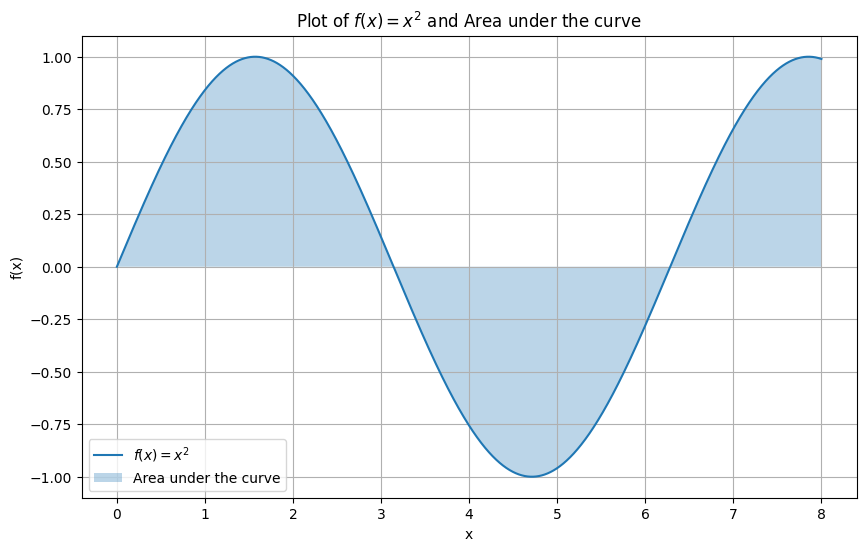

1 - cos(8)

In [6]:
def exact_int(integral_result, resolution):
    # Create a numeric version of the function for plotting
    f_numeric = sp.lambdify(x, f, 'numpy')

    # Generate x values for plotting
    x_vals = np.linspace(0, 8, resolution)
    y_vals = f_numeric(x_vals)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='$f(x) = x^2$')

    # Shade the area under the curve for the integral
    x_fill = np.linspace(0, 8, 400)
    y_fill = f_numeric(x_fill)
    plt.fill_between(x_fill, y_fill, alpha=0.3, label='Area under the curve')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Plot of $f(x) = x^2$ and Area under the curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # print("The exact integral of x^2 from 0 to 8 is:", integral_result)
    return integral_result

integral_result = sp.integrate(f, (x, 0, 8))
exact_int(integral_result, 4000)


So we see that the exact value for the area under the curve is 512/3. Note that changing the resolution only affects the ability to shade the area under the curve more precisely (soley visual). The value for the soltuion does not change.

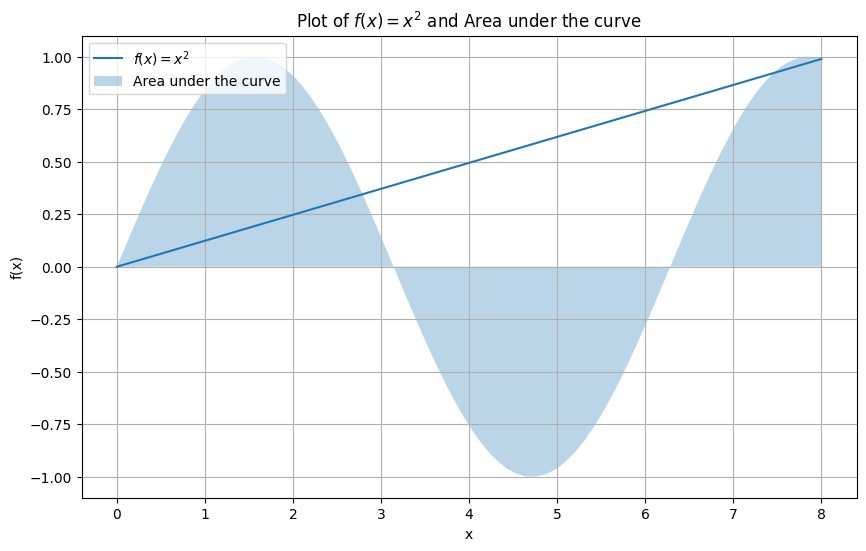

1 - cos(8)

In [7]:
exact_int(integral_result, 2)

Now lets model the midpoint rule <br>
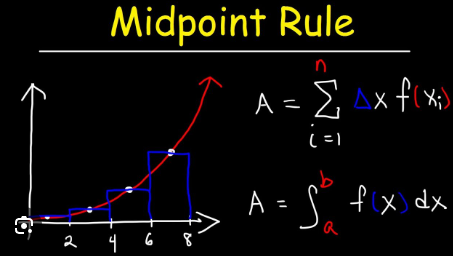

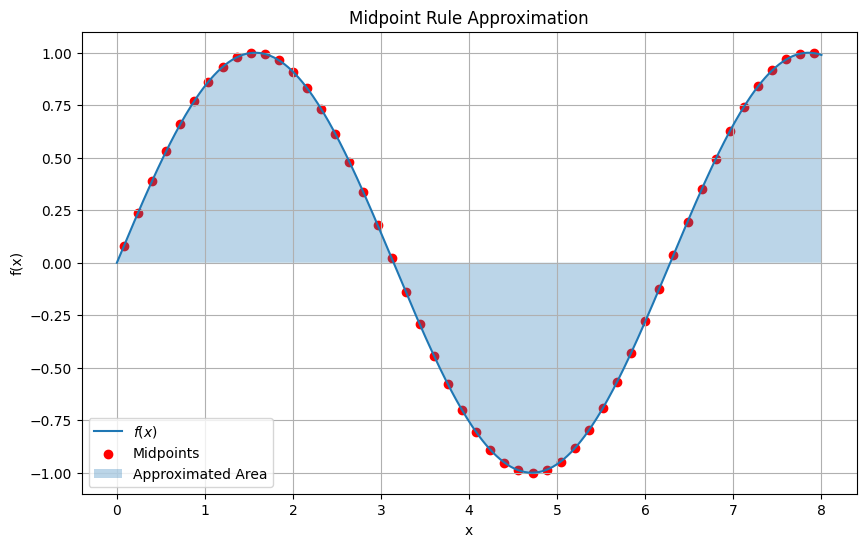

In [8]:
def midpoint_rule_integration(f, a, b, n, plot=False):
    # Calculate the width of each subinterval
    h = (b - a) / n
    
    # Calculate the midpoints of each subinterval
    midpoints = [a + (i + 0.5) * h for i in range(n)]

    # Calculate the sum of function values at midpoints
    approximation = h * sum([f.subs(x, midpoint) for midpoint in midpoints])

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the midpoints
        plt.scatter(midpoints, [f_numeric(midpoint) for midpoint in midpoints], color='red', label='Midpoints')

        # Shade the area under the curve for the approximation
        x_fill = np.linspace(a, b, 400)
        y_fill = f_numeric(x_fill)
        plt.fill_between(x_fill, y_fill, alpha=0.3, label='Approximated Area')

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Midpoint Rule Approximation')
        plt.legend()
        plt.grid(True)
        plt.show()

    # print("Approximated integral using Midpoint Rule:", approximation)
    return approximation

# Call the function with and without plotting
approximation = midpoint_rule_integration(f, a, b, n, plot=True)


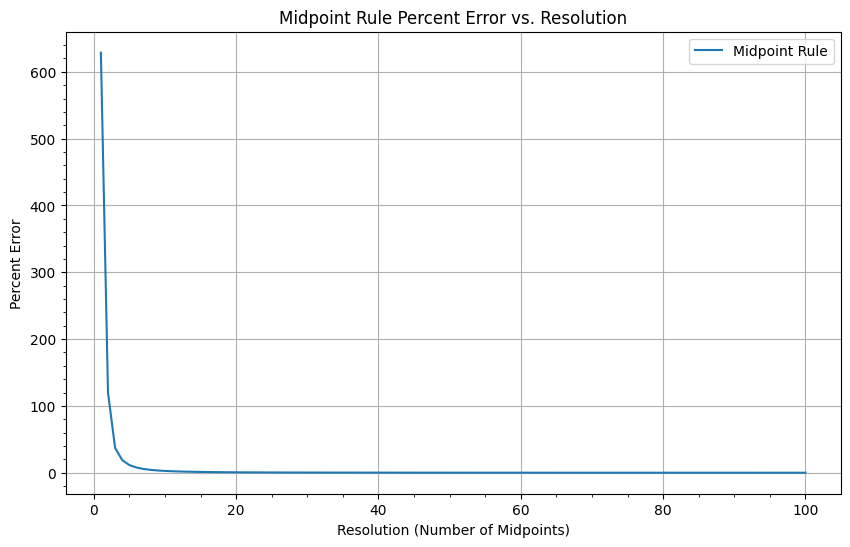

In [9]:
def graph_midpoint_error():
    percent_errors = []
    resolutions = range(1, 101)
    for resolution in range(1, 101):
        # Call the function
        approximation = midpoint_rule_integration(f, a, b, resolution)
        percent_error = abs(integral_result - approximation) / integral_result * 100
        percent_errors.append(percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, percent_errors, label='Midpoint Rule')
    plt.xlabel('Resolution (Number of Midpoints)')
    plt.ylabel('Percent Error')
    plt.title('Midpoint Rule Percent Error vs. Resolution')
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()
    
# Call the functions to graph the errors
graph_midpoint_error()

In [10]:
midpoint_rule_integration(f, a, b, 2)

2.51952771450702

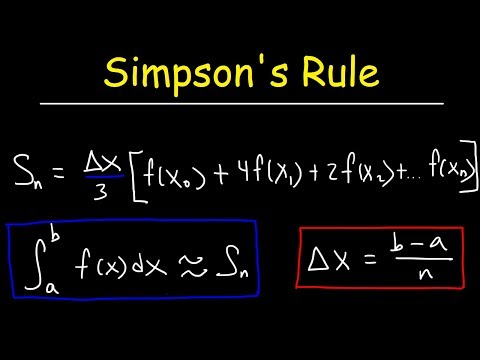

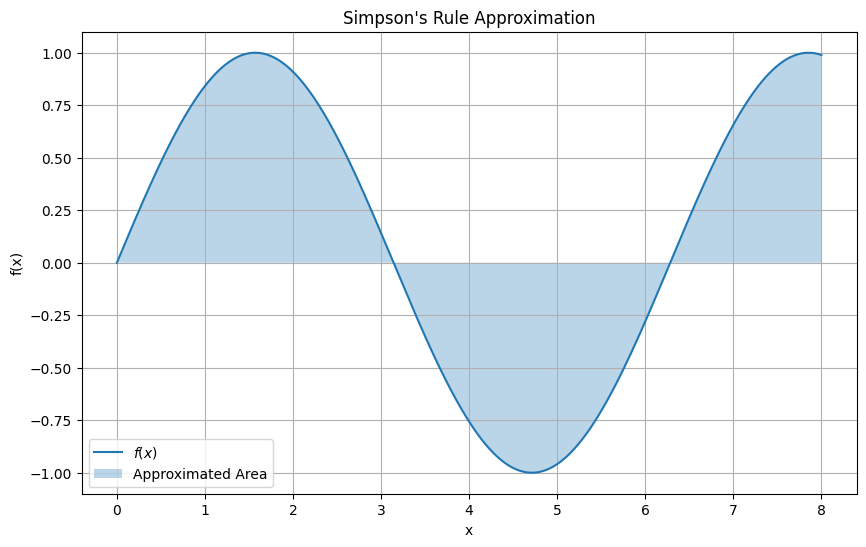

In [11]:
def simpsons_rule_integration(f, a, b, n, plot=False):
    # Calculate the width of each subinterval
    h = (b - a) / n

    # Calculate the x values for the subinterval points
    x_values = np.linspace(a, b, n + 1)

    # Calculate the function values at the subinterval points
    y_values = np.array([f.subs(x, xi) for xi in x_values])

    # Use SciPy's simps to calculate the integral
    approximation = simps(y_values, x_values)

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the shaded area under the curve for the approximation
        x_fill = np.linspace(a, b, 400)
        y_fill = f_numeric(x_fill)
        plt.fill_between(x_fill, y_fill, alpha=0.3, label="Approximated Area")

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title("Simpson's Rule Approximation")
        plt.legend()
        plt.grid(True)
        plt.show()

    return approximation

# Call the function with and without plotting
approximation = simpsons_rule_integration(f, a, b, n, plot=True)

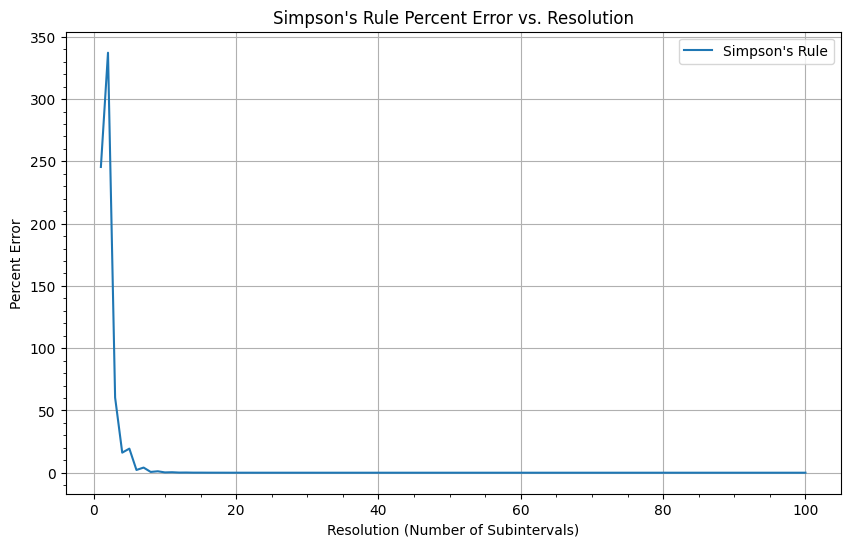

In [12]:
def graph_simpson_error():
    # Calculate the definite integral
    integral_result = sp.integrate(f, (x, 0, 8))

    percent_errors = []
    resolutions = range(1, 101)
    for resolution in range(1, 101):
        # Call the function
        approximation = simpsons_rule_integration(f, a, b, resolution)
        percent_error = abs(integral_result - approximation) / integral_result * 100
        percent_errors.append(percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, percent_errors, label="Simpson's Rule")
    plt.xlabel('Resolution (Number of Subintervals)')
    plt.ylabel('Percent Error')
    plt.title("Simpson's Rule Percent Error vs. Resolution")
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the functions to graph the errors
graph_simpson_error()

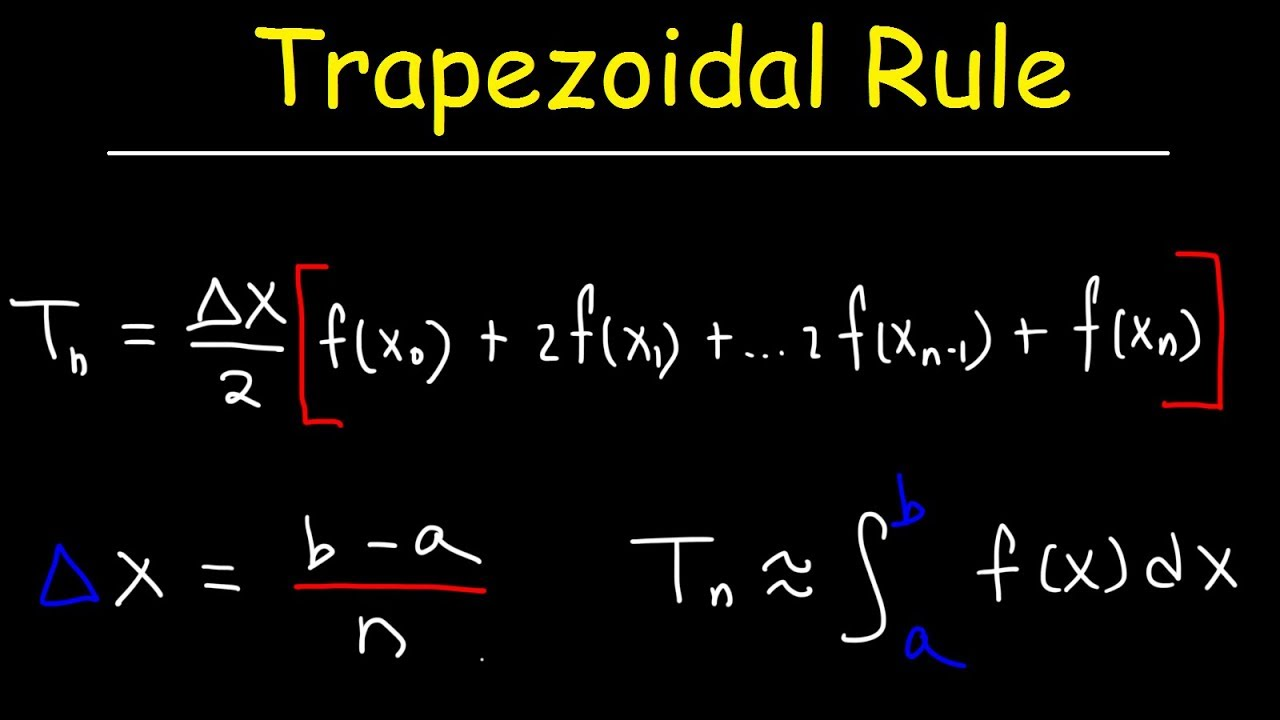

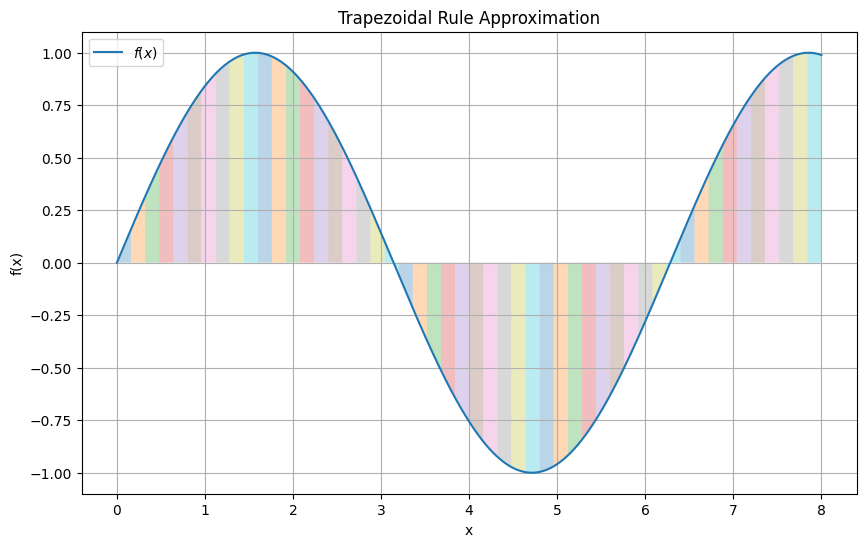

In [13]:

def trapezoid_rule_integration(f, a, b, n, plot=False):
    # Calculate the width of each subinterval
    h = (b - a) / n

    # Calculate x values for the subinterval points
    x_values = [a + i * h for i in range(n + 1)]

    # Calculate the sum of function values using the Trapezoidal Rule
    approximation = (h / 2) * (f.subs(x, a) + 2 * sum([f.subs(x, x_values[i]) for i in range(1, n)]) + f.subs(x, b))

    if plot:
        # Create a numeric version of the function for plotting
        f_numeric = sp.lambdify(x, f, 'numpy')

        # Generate x values for plotting
        x_vals = np.linspace(a, b, 400)
        y_vals = f_numeric(x_vals)

        # Plot the function
        plt.figure(figsize=(10, 6))
        plt.plot(x_vals, y_vals, label='$f(x)$')

        # Plot the trapezoids
        for i in range(n):
            x_i = x_values[i:i+2]
            y_i = [f_numeric(x_i[0]), f_numeric(x_i[1])]
            plt.fill_between(x_i, y_i, alpha=0.3)

        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('Trapezoidal Rule Approximation')
        plt.legend()
        plt.grid(True)
        plt.show()

    return approximation

# Call the function with and without plotting
approximation = trapezoid_rule_integration(f, a, b, n, plot=True)

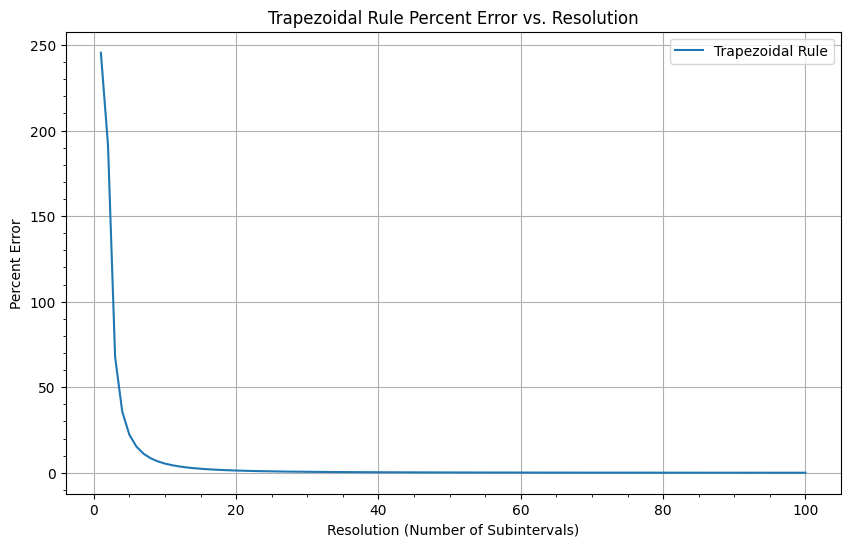

In [14]:
def graph_trapezoid_error():
    percent_errors = []
    resolutions = range(1, 101)
    for resolution in range(1, 101):
        # Call the function
        approximation = trapezoid_rule_integration(f, a, b, resolution)
        percent_error = abs(integral_result - approximation) / integral_result * 100
        percent_errors.append(percent_error)

    plt.figure(figsize=(10, 6))
    plt.plot(resolutions, percent_errors, label='Trapezoidal Rule')
    plt.xlabel('Resolution (Number of Subintervals)')
    plt.ylabel('Percent Error')
    plt.title('Trapezoidal Rule Percent Error vs. Resolution')
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to graph the error for the Trapezoidal Rule
graph_trapezoid_error()

In [15]:
def calculate_errors(f, a, b, n_values):
    x = sp.Symbol('x')
    integral_result = sp.integrate(f, (x, a, b))

    midpoint_errors = []
    trapezoid_errors = []
    simpsons_errors = []

    for n in n_values:
        midpoint_approximation = midpoint_rule_integration(f, a, b, n)
        trapezoid_approximation = trapezoid_rule_integration(f, a, b, n)
        simpsons_approximation = simpsons_rule_integration(f, a, b, n)

        midpoint_error = abs(integral_result - midpoint_approximation) / integral_result * 100
        trapezoid_error = abs(integral_result - trapezoid_approximation) / integral_result * 100
        simpsons_error = abs(integral_result - simpsons_approximation) / integral_result * 100

        midpoint_errors.append(midpoint_error)
        trapezoid_errors.append(trapezoid_error)
        simpsons_errors.append(simpsons_error)

    return midpoint_errors, trapezoid_errors, simpsons_errors

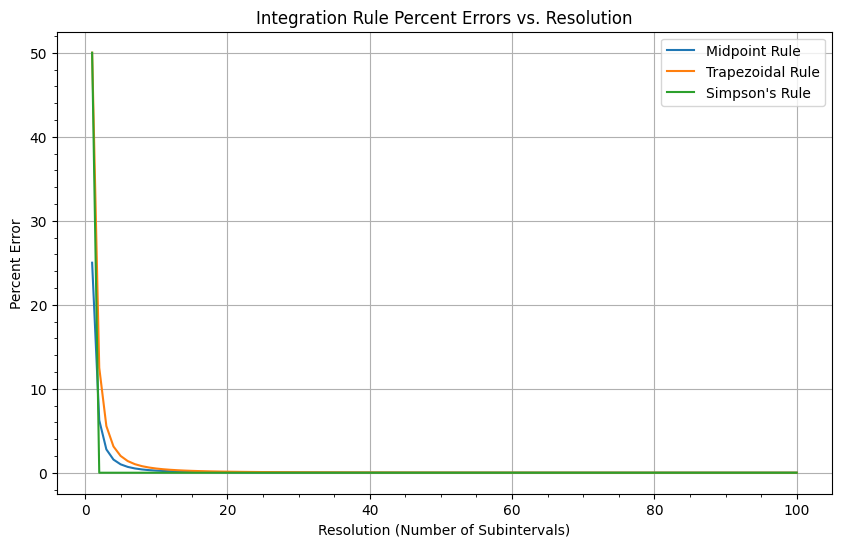

In [16]:
def plot_all_errors():
    x = sp.Symbol('x')
    f = x**2
    a = 0
    b = 8
    n_values = range(1, 101)

    midpoint_errors, trapezoid_errors, simpsons_errors = calculate_errors(f, a, b, n_values)

    plt.figure(figsize=(10, 6))
    plt.plot(n_values, midpoint_errors, label='Midpoint Rule')
    plt.plot(n_values, trapezoid_errors, label='Trapezoidal Rule')
    plt.plot(n_values, simpsons_errors, label="Simpson's Rule")

    plt.xlabel('Resolution (Number of Subintervals)')
    plt.ylabel('Percent Error')
    plt.title('Integration Rule Percent Errors vs. Resolution')
    plt.minorticks_on()
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to plot errors for all three integration methods
plot_all_errors()